In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
dataset_path = r'C:\Users\Patoju Karthikeya\OneDrive\Desktop\train\New folder'

In [10]:
def load_images(dataset_path, image_size=(64, 64)):
    images = []
    labels = []
    
    # Check if the main dataset path exists
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset path {dataset_path} does not exist.")
    
    for label, category in enumerate(['cat', 'dog']):
        category_path =r"C:\Users\Patoju Karthikeya\OneDrive\Desktop\train\New folder (2)"
        
        # Check if the category path exists
        if not os.path.exists(category_path):
            raise FileNotFoundError(f"Category path {category_path} does not exist.")
        
        for file in os.listdir(category_path):
            if file.endswith('.jpg') or file.endswith('.png'):
                file_path = os.path.join(category_path, file)
                try:
                    image = Image.open(file_path).convert('L')  # Convert to grayscale
                    image = image.resize(image_size)
                    image_array = np.array(image).flatten()
                    images.append(image_array)
                    labels.append(label)
                except Exception as e:
                    print(f"Failed to process file {file_path}: {e}")
    
    return np.array(images), np.array(labels)




In [11]:
X, y = load_images(dataset_path)

X = X / 255.0

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [14]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.12


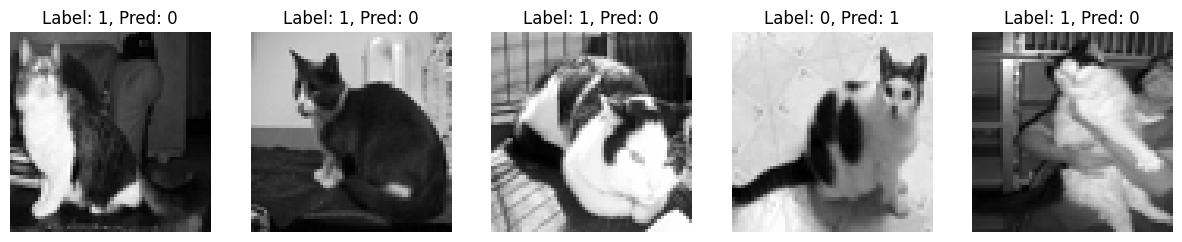

In [15]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Label: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()